In [1]:
#Load the dataset into a pandas DataFrame
import pandas as pd
import numpy as np

#Inspect the first few rows
df=pd.read_csv('class-grades.csv', on_bad_lines='warn', engine='python' )

#Check the data types of each column
df.head()



Skipping line 22: Expected 6 fields in line 22, saw 7
Skipping line 40: Expected 6 fields in line 40, saw 7
Skipping line 62: Expected 6 fields in line 62, saw 7


,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [73]:
#Check for missing values
df.isnull().sum()


Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         0
Overall       0
dtype: int64

In [21]:
#strategy for handling missing values
df.fillna(0)


,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
91,8,96.73,103.71,45.00,93.52,61.94
92,7,85.34,80.54,41.25,93.70,39.72
93,8,89.94,102.77,87.50,90.74,87.78
94,7,95.60,76.13,66.25,99.81,85.56


In [12]:
#Implementing the chosen strategy
df.isnull().sum()


Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64

In [58]:
#Compute summary statistics
summary_statistics=df.describe()
numerical_summary_stats=summary_statistics.drop(columns=['Prefix'])
relevant_statistics=summary_statistics.loc[['mean','50%','min','max']]
print(numerical_summary_stats)



       Assignment    Tutorial     Midterm    TakeHome       Final
count   96.000000   96.000000   96.000000   95.000000   96.000000
mean    85.809896   89.631875   68.444271   81.406737   68.414375
std     12.498312   15.243599   19.472524   23.443489   18.801087
min     28.140000   34.090000   28.120000   16.910000   28.060000
25%     81.220000   83.170000   52.965000   67.960000   53.122500
50%     90.020000   93.370000   70.000000   87.960000   66.250000
75%     95.012500  100.535000   83.277500   99.070000   84.167500
max    100.830000  112.580000  110.000000  108.890000  108.890000


<Axes: xlabel='Assignment', ylabel='Count'>

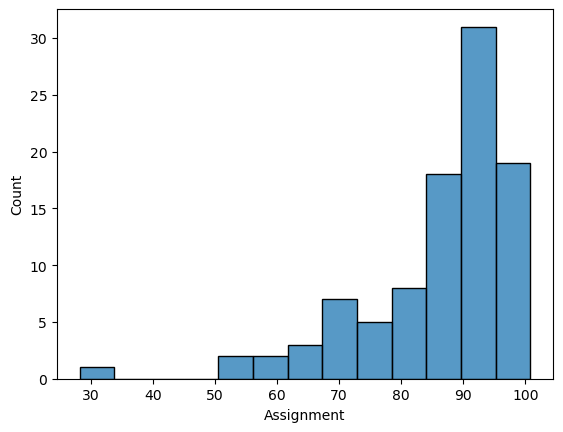

In [65]:
#Visualize the distribution
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(data=df,x='Assignment')



<Axes: xlabel='Tutorial', ylabel='Count'>

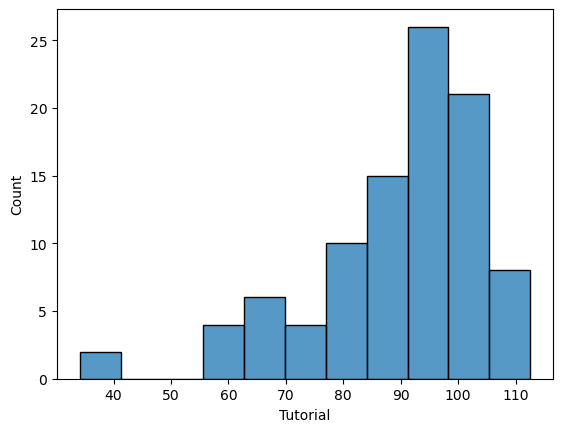

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(data=df,x='Tutorial')


<function matplotlib.pyplot.show(close=None, block=None)>

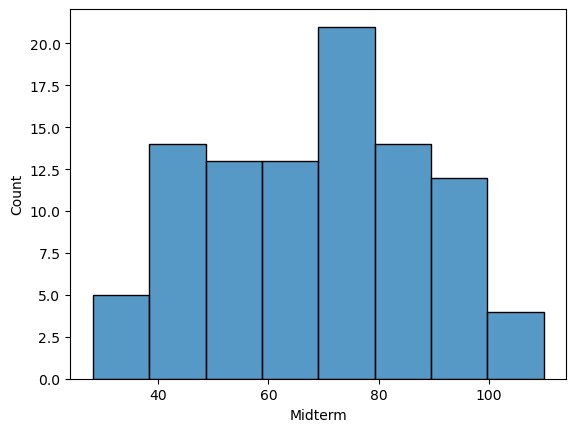

In [61]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(data=df,x='Midterm')


<Axes: xlabel='TakeHome', ylabel='Count'>

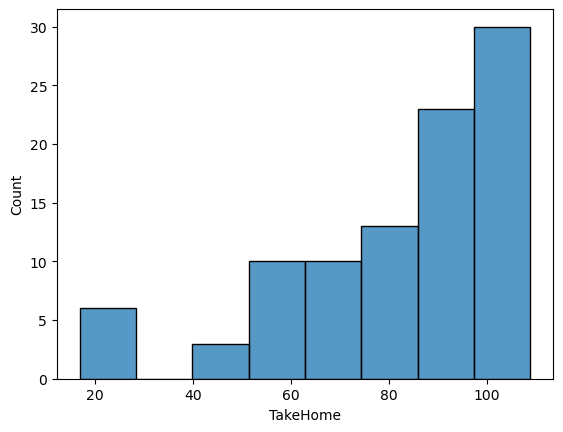

In [62]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(data=df,x='TakeHome')

<Axes: xlabel='Final', ylabel='Count'>

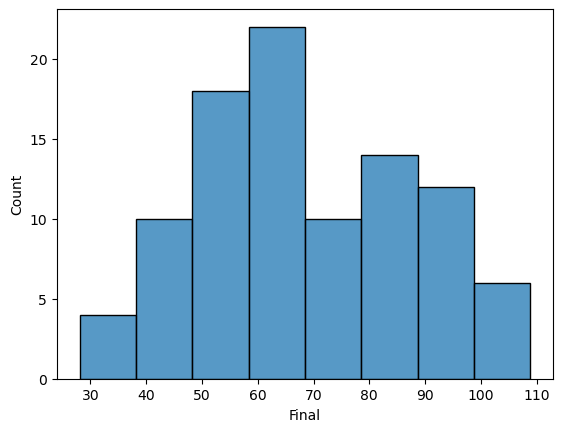

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(data=df,x='Final')


              Prefix  Assignment  Tutorial   Midterm  TakeHome     Final
Prefix      1.000000    0.051822  0.434839 -0.057001 -0.069000  0.090255
Assignment  0.051822    1.000000  0.458301  0.204147  0.483206  0.291232
Tutorial    0.434839    0.458301  1.000000  0.149304  0.238167  0.240551
Midterm    -0.057001    0.204147  0.149304  1.000000  0.427190  0.725121
TakeHome   -0.069000    0.483206  0.238167  0.427190  1.000000  0.474231
Final       0.090255    0.291232  0.240551  0.725121  0.474231  1.000000


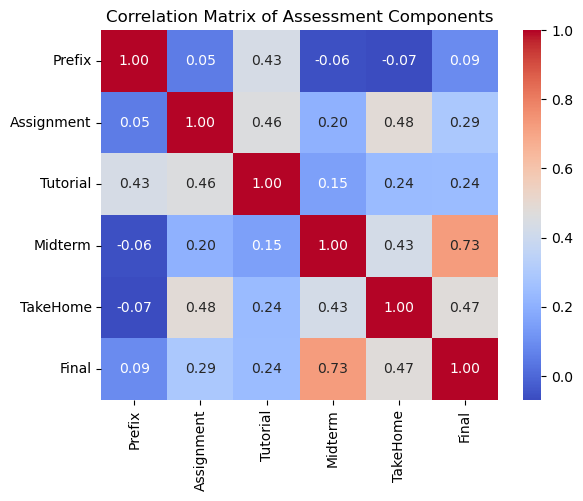

In [64]:
# Explore the correlation between different assessment components
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Assessment Components')
plt.show()

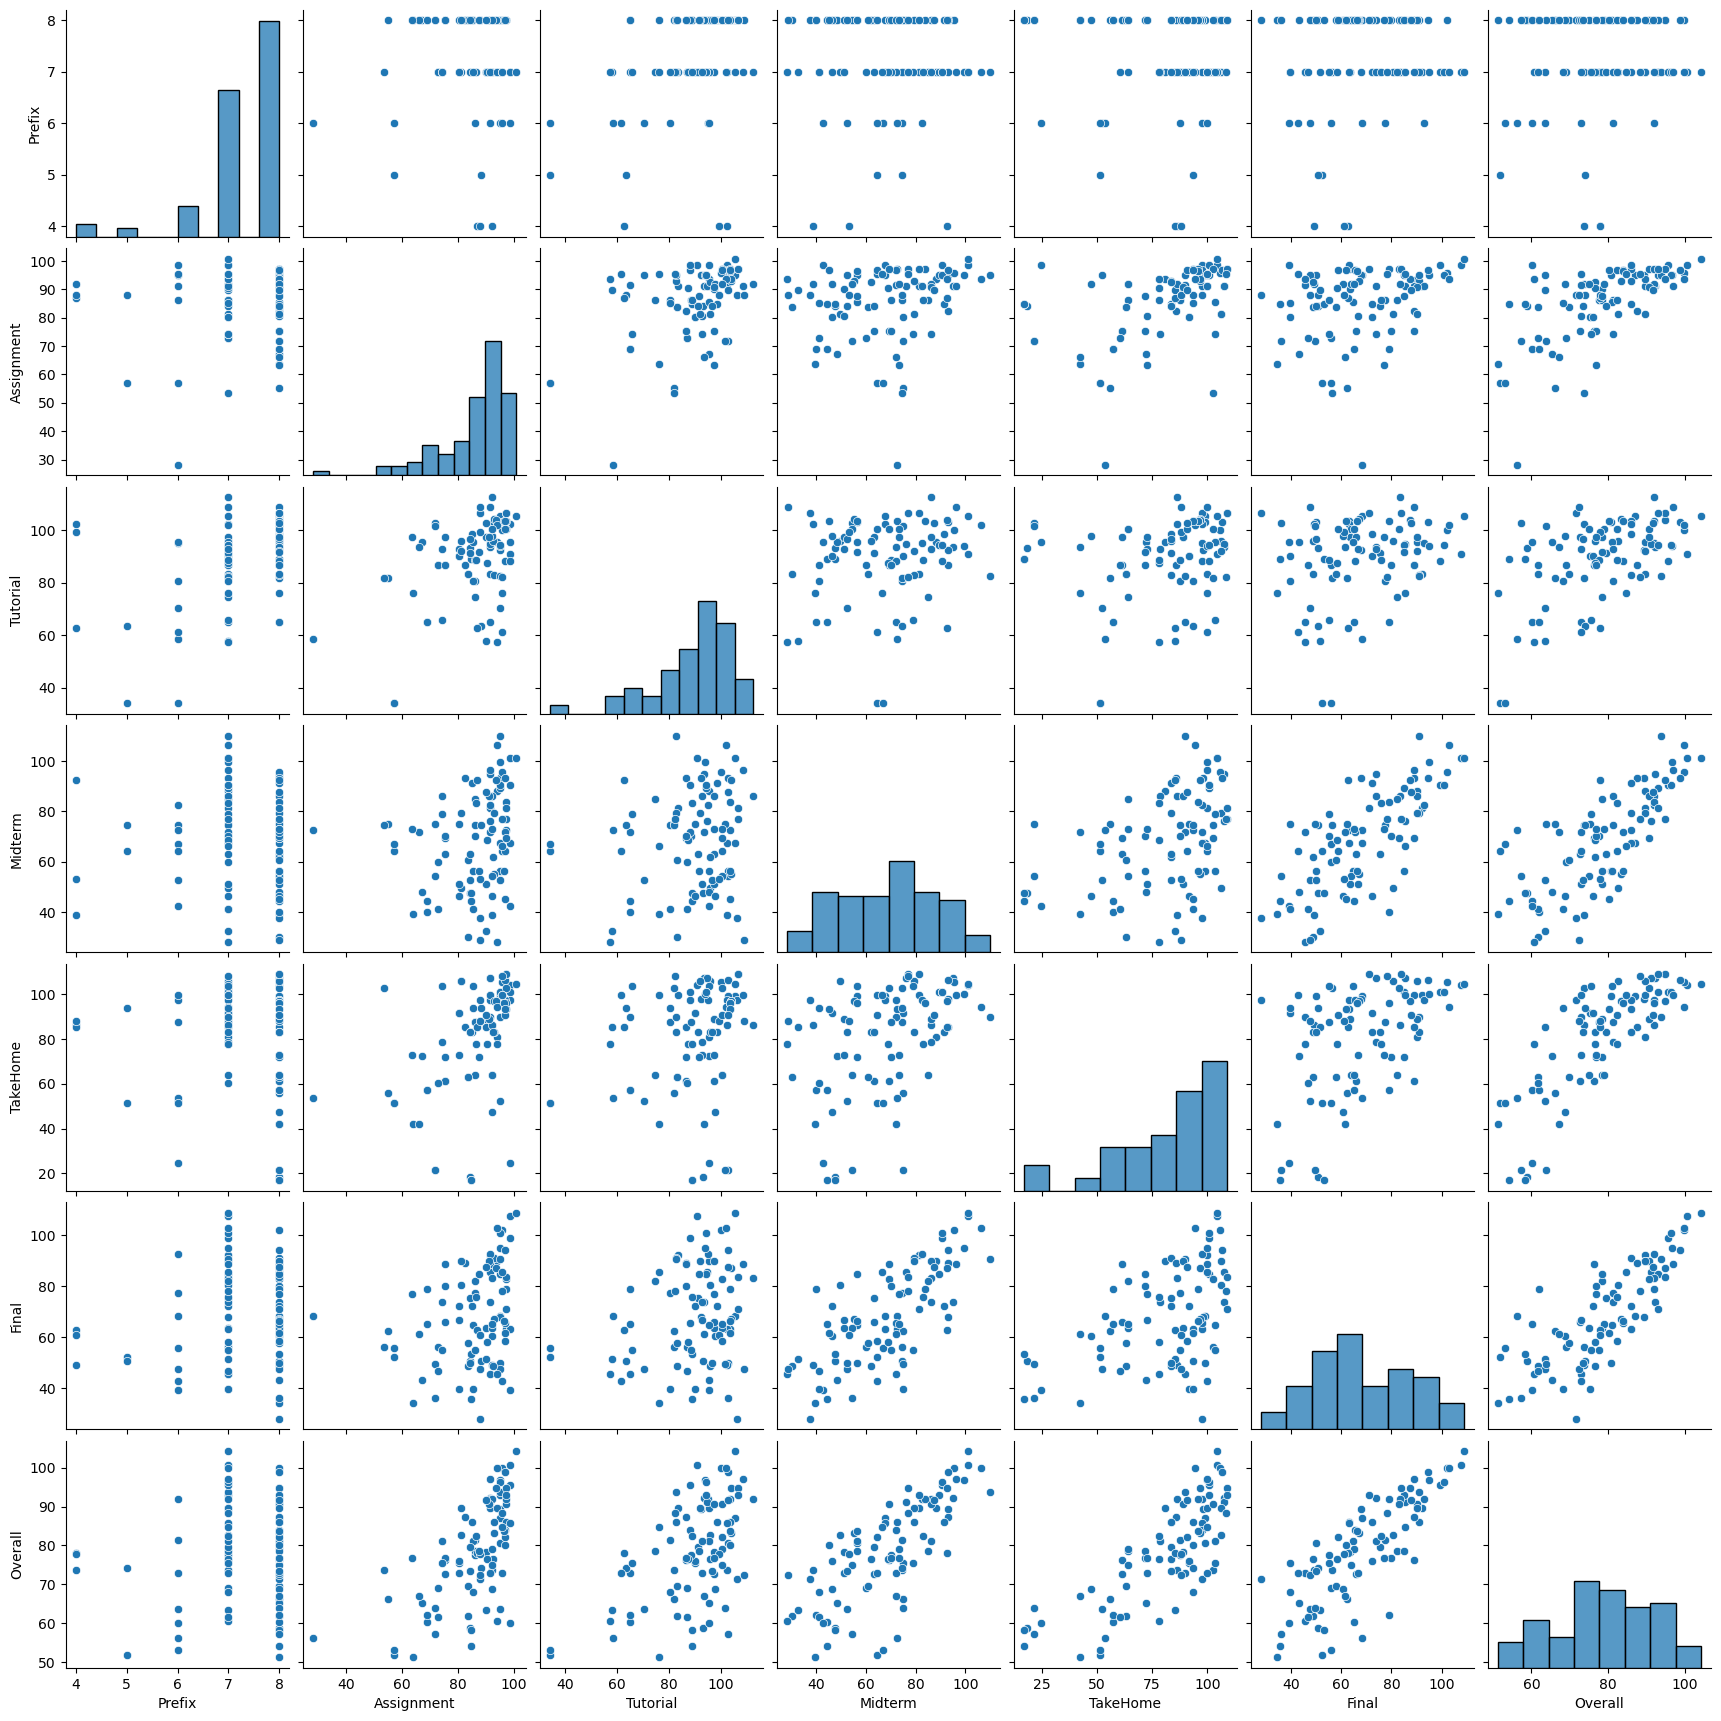

In [77]:
# Plot pairplot
sns.pairplot(df)
 
# Show the plot
plt.show()

In [79]:
df['Overall'] = df[['Assignment', 'Tutorial', 'Midterm', 'TakeHome', 'Final']].mean(axis=1)
print(df)

    Prefix  Assignment  Tutorial  Midterm  TakeHome  Final  Overall
0        5       57.14     34.09    64.38     51.48  52.50   51.918
1        8       95.05    105.49    67.50     99.07  68.33   87.088
2        8       83.70     83.17    30.00     63.15  48.89   61.782
3        7       81.22     96.06    49.38    105.93  80.56   82.630
4        8       91.32     93.64    95.00    107.41  73.89   92.252
..     ...         ...       ...      ...       ...    ...      ...
91       8       96.73    103.71    45.00     93.52  61.94   80.180
92       7       85.34     80.54    41.25     93.70  39.72   68.110
93       8       89.94    102.77    87.50     90.74  87.78   91.746
94       7       95.60     76.13    66.25     99.81  85.56   84.670
95       8       63.40     97.37    73.12     72.78  77.22   76.778

[96 rows x 7 columns]


<Axes: xlabel='Overall', ylabel='Count'>

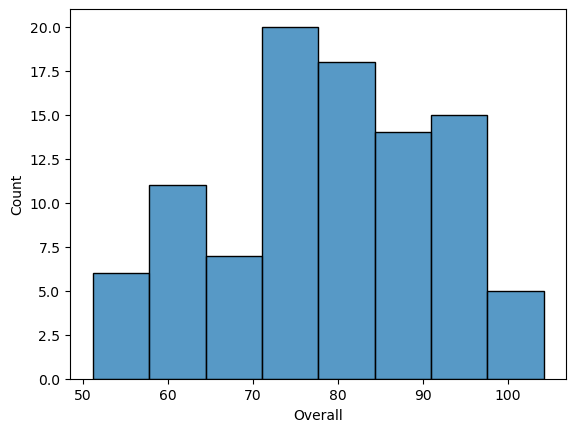

In [80]:
#Visualize the distribution of overall grades using a histogram.
sns.histplot(data=df,x='Overall')

In [81]:
#Performance Analysis

# Define the passing grade threshold
passing_grade = 50 

# Identify passing and failing students
passing_students = df[df['Final'] >= passing_grade]
failing_students = df[df['Final'] < passing_grade]

# Calculate the proportion of passing and failing students
passing_percentage = (len(passing_students) / len(df)) * 100
failing_percentage = (len(failing_students) / len(df)) * 100

print(f"Passing Percentage: {passing_percentage:.2f}%")
print(f"Failing Percentage: {failing_percentage:.2f}%")


Passing Percentage: 81.25%
Failing Percentage: 18.75%


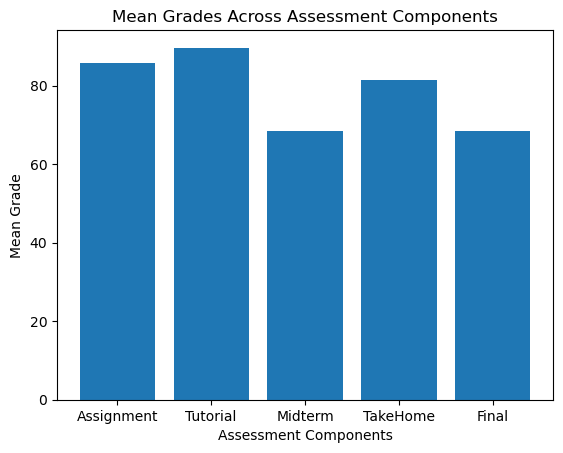

In [82]:
# Compute mean grades for each assessment component
mean_grades = df[['Assignment', 'Tutorial', 'Midterm', 'TakeHome', 'Final']].mean()

# Visualize mean grades
import matplotlib.pyplot as plt

plt.bar(mean_grades.index, mean_grades.values)
plt.xlabel('Assessment Components')
plt.ylabel('Mean Grade')
plt.title('Mean Grades Across Assessment Components')
plt.show()
